In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
%matplotlib inline

In [5]:
# Try to get the gpu, if available
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

Using device cuda:0


In [ ]:
! curl https://cernbox.cern.ch/s/zZDKjltAcJW0RB7/download -o Data-MLtutorial.tar.gz
! tar -xvzf Data-MLtutorial.tar.gz
! ls Data-MLtutorial/JetDataset/
! rm Data-MLtutorial.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    26  100    26    0     0    106      0 --:--:-- --:--:-- --:--:--   106

gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now
ls: cannot access 'Data-MLtutorial/JetDataset/': No such file or directory


In [3]:
##big dataset
! curl https://zenodo.org/record/3602254/files/hls4ml_LHCjet_100p_train.tar.gz?download=1 -o hls4ml_LHCjet_100p_train.tar.gz
! tar -xvzf hls4ml_LHCjet_100p_train.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2636M  100 2636M    0     0  5212k      0  0:08:37  0:08:37 --:--:-- 5230k
train/jetImage_0_100p_0_10000.h5
train/jetImage_0_100p_10000_20000.h5
train/jetImage_0_100p_20000_30000.h5
train/jetImage_0_100p_30000_40000.h5
train/jetImage_0_100p_40000_50000.h5
train/jetImage_0_100p_50000_60000.h5
train/jetImage_0_100p_60000_70000.h5
train/jetImage_0_100p_70000_80000.h5
train/jetImage_0_100p_80000_90000.h5
train/jetImage_1_100p_0_10000.h5
train/jetImage_1_100p_10000_20000.h5
train/jetImage_1_100p_20000_30000.h5
train/jetImage_1_100p_30000_40000.h5
train/jetImage_1_100p_40000_50000.h5
train/jetImage_1_100p_50000_60000.h5
train/jetImage_1_100p_60000_70000.h5
train/jetImage_1_100p_70000_80000.h5
train/jetImage_1_100p_80000_90000.h5
train/jetImage_2_100p_0_10000.h5
train/jetImage_2_100p_10000_20000.h5
train/jetImage_2_100p_20000_30000.h

In [6]:
datafiles_bigDataset = ['train/jetImage_0_100p_0_10000.h5',
'train/jetImage_0_100p_10000_20000.h5',
'train/jetImage_0_100p_20000_30000.h5',
'train/jetImage_0_100p_30000_40000.h5',
'train/jetImage_0_100p_40000_50000.h5',
'train/jetImage_0_100p_50000_60000.h5',
'train/jetImage_0_100p_60000_70000.h5',
'train/jetImage_0_100p_70000_80000.h5',
'train/jetImage_0_100p_80000_90000.h5',
'train/jetImage_1_100p_0_10000.h5',
'train/jetImage_1_100p_10000_20000.h5',
'train/jetImage_1_100p_20000_30000.h5',
'train/jetImage_1_100p_30000_40000.h5',
'train/jetImage_1_100p_40000_50000.h5',
'train/jetImage_1_100p_50000_60000.h5',
'train/jetImage_1_100p_60000_70000.h5',
'train/jetImage_1_100p_70000_80000.h5',
'train/jetImage_1_100p_80000_90000.h5',
'train/jetImage_2_100p_0_10000.h5',
'train/jetImage_2_100p_10000_20000.h5',
'train/jetImage_2_100p_20000_30000.h5',
'train/jetImage_2_100p_30000_40000.h5',
'train/jetImage_2_100p_40000_50000.h5',
'train/jetImage_2_100p_50000_60000.h5',
'train/jetImage_2_100p_60000_70000.h5',
'train/jetImage_2_100p_70000_80000.h5',
'train/jetImage_2_100p_80000_90000.h5',
'train/jetImage_3_100p_0_10000.h5',
'train/jetImage_3_100p_10000_20000.h5',
'train/jetImage_3_100p_20000_30000.h5',
'train/jetImage_3_100p_30000_40000.h5',
'train/jetImage_3_100p_40000_50000.h5',
'train/jetImage_3_100p_50000_60000.h5',
'train/jetImage_3_100p_60000_70000.h5',
'train/jetImage_3_100p_70000_80000.h5',
'train/jetImage_3_100p_80000_90000.h5',
'train/jetImage_4_100p_0_10000.h5',
'train/jetImage_4_100p_10000_20000.h5',
'train/jetImage_4_100p_20000_30000.h5',
'train/jetImage_4_100p_30000_40000.h5',
'train/jetImage_4_100p_40000_50000.h5',
'train/jetImage_4_100p_50000_60000.h5',
'train/jetImage_4_100p_60000_70000.h5',
'train/jetImage_4_100p_70000_80000.h5',
'train/jetImage_4_100p_80000_90000.h5',
'train/jetImage_5_100p_0_10000.h5',
'train/jetImage_5_100p_10000_20000.h5',
'train/jetImage_5_100p_20000_30000.h5',
'train/jetImage_5_100p_30000_40000.h5',
'train/jetImage_5_100p_40000_50000.h5',
'train/jetImage_5_100p_50000_60000.h5',
'train/jetImage_5_100p_60000_70000.h5',
'train/jetImage_5_100p_70000_80000.h5',
'train/jetImage_5_100p_80000_90000.h5',
'train/jetImage_6_100p_0_10000.h5',
'train/jetImage_6_100p_10000_20000.h5',
'train/jetImage_6_100p_20000_30000.h5',
'train/jetImage_6_100p_30000_40000.h5',
'train/jetImage_6_100p_40000_50000.h5',
'train/jetImage_6_100p_50000_60000.h5',
'train/jetImage_6_100p_60000_70000.h5',
'train/jetImage_6_100p_80000_90000.h5',
'train/jetImage_7_100p_0_10000.h5',
'train/jetImage_7_100p_20000_30000.h5']

In [7]:
inputDir = "Data-MLtutorial/JetDataset/"
#inputDir = "train/"

target = np.array([])
jetList = np.array([])
# we cannot load all data on Colab. So we just take a few files
#datafiles = ['%s/jetImage_7_100p_30000_40000.h5' %inputDir,
#          '%s/jetImage_7_100p_60000_70000.h5' %inputDir,
#            '%s/jetImage_7_100p_50000_60000.h5' %inputDir,
#            '%s/jetImage_7_100p_10000_20000.h5' %inputDir,
#            '%s/jetImage_7_100p_0_10000.h5' %inputDir]

datafiles = datafiles_bigDataset
for i, fileIN in enumerate(datafiles):
    if i > 30: continue
    f = h5py.File(fileIN)
    print(f.keys())
    if i == 0: print(f.get("particleFeatureNames")[:])
    print("Appending %s" %fileIN)
    myJetList = np.array(f.get("jetConstituentList"))
    mytarget = np.array(f.get('jets')[0:,-6:-1])
    jetList = np.concatenate([jetList, myJetList], axis=0) if jetList.size else myJetList
    target = np.concatenate([target, mytarget], axis=0) if target.size else mytarget
    del myJetList, mytarget
    f.close()
print(target.shape, jetList.shape)

<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']>
[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel' b'j1_pdgid']
Appending train/jetImage_0_100p_0_10000.h5
<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']>
Appending train/jetImage_0_100p_10000_20000.h5
<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']>
Appending train/jetImage_0_100p_20000_30000.h5
<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']>
Appending train/jetImage_0_100p_30000_40000.h5
<KeysViewHDF5 ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL',

In [8]:
# we standardize the data, so that the mean is = 0 and rms = 1
from sklearn.preprocessing import StandardScaler
print(np.mean(jetList[:,:,10]), np.var(jetList[:,:,10]))

scalers = {}
for i in range(jetList.shape[2]):
    scalers[i] = StandardScaler()
    scalers[i].fit(jetList[:,:,i])
    jetList[:,:,i] = scalers[i].transform(jetList[:,:,i])

#scaler = StandardScaler()
#scaler.fit(jetList)
#features = scaler.transform(jetList)
print(np.mean(jetList[:,:,10]), np.var(jetList[:,:,10]))

-0.0024198376577618066 1.6172001962334621
1.815322086199998e-19 0.9999999999994045


In [9]:
jetList_standard = jetList[np.argmax(target,axis=1)<2]
jetList_W = jetList[np.argmax(target,axis=1)==2]
jetList_Z = jetList[np.argmax(target,axis=1)==3]
jetList_t = jetList[np.argmax(target,axis=1)==4]
print(jetList_standard.shape, jetList_W.shape, jetList_Z.shape, jetList_t.shape)

(122541, 100, 16) (62481, 100, 16) (62223, 100, 16) (62755, 100, 16)


In [10]:
label_standard = target[np.argmax(target,axis=1)<2]
print(label_standard)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [11]:
from sklearn.model_selection import train_test_split

#split into training and test
X_learn, X_test, label_learn, label_test = train_test_split(jetList_standard, label_standard, test_size=0.2)
print(X_learn.shape, label_learn.shape, X_test.shape, label_test.shape)

#split the training dataset into training and validation
X_train, X_val, label_train, label_val = train_test_split(X_learn, label_learn, test_size=0.2)
print(X_train.shape, label_train.shape, X_val.shape,  label_val.shape, X_test.shape, label_test.shape)

del jetList_standard, label_standard, jetList, X_learn, label_learn

(98032, 100, 16) (98032, 5) (24509, 100, 16) (24509, 5)
(78425, 100, 16) (78425, 5) (19607, 100, 16) (19607, 5) (24509, 100, 16) (24509, 5)


In [12]:
# keras imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Lambda, Layer, Reshape, UpSampling1D, Masking
from tensorflow.keras.layers import Dense, Input, Conv1D, Conv1DTranspose, AveragePooling1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [13]:
def sample_z(args):
    z_mean, z_log_var = args
    print(z_mean, z_log_var)
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    eps = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(z_log_var / 2) * eps

In [ ]:
from tensorflow.nn import softmax
def sample_dirichlet(args):
  sample = sample_z(args)
  return softmax(sample)

In [14]:
from tensorflow.keras import backend as K

# Define loss
def myloss(y_true, y_pred):
    # mse
    sum_sq = (y_true-y_pred)*(y_true-y_pred)
    return K.sum(sum_sq, axis=-1)

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):
        mu, log_var = inputs
        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)
        self.add_loss(K.mean(kl_batch), inputs=inputs)
        return inputs

In [15]:
featureArrayLength = (X_train.shape[1], X_train.shape[2])
print(featureArrayLength)
dropoutRate = 0.25

(100, 16)


In [16]:
#####Building the model
def Conv1D_vae(input_dim, latent_dim):

  ### 1D Conv Encoder
  input_encoder = Input(shape=(input_dim), name='encoder_input')
  x = Masking(mask_value=0.0)(input_encoder)
  x = Conv1D(16, kernel_size=3, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = MaxPooling1D(pool_size=3)(x)
  #
  x = Conv1D(32, kernel_size=3, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = MaxPooling1D(pool_size=3)(x)
  #
  x = Conv1D(64, kernel_size=3, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = MaxPooling1D(pool_size=9)(x)
  #
  x = Flatten()(x)
  x = Dense(20, activation='elu')(x)
  #x = Dropout(dropoutRate)(x)
  #x = Dense(10, activation='relu')(x)

  z_mu = Dense(latent_dim, name='latent_mu')(x)
  z_log_var = Dense(latent_dim, name='latent_logvar')(x)
  z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])

  #gaussian latent space
  z = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([z_mu, z_log_var])
  #dirichlet latent space: softmax(gaussian)
  #z = Lambda(sample_dirichlet, output_shape=(latent_dim, ), name='z')([z_mu, z_log_var])
  encoder = Model(inputs=input_encoder, outputs=[z_mu, z_log_var, z], name='encoder')
  encoder.summary()

  #decoder
  input_decoder = Input(shape=(latent_dim,), name='decoder_input')
  #x = Dense(10, activation='relu')(input_decoder)
  x = Dense(20, activation='elu')(input_decoder)
  x = Dense(12*64, activation='elu')(x)
  x = Reshape(target_shape=(12,64))(x)
  #x = UpSampling1D(9)(x)
  x = Conv1DTranspose(32, kernel_size=3, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = UpSampling1D(3)(x)
  x = Conv1DTranspose(16, kernel_size=2, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = UpSampling1D(3)(x)
  x = Conv1DTranspose(16, kernel_size=2, data_format="channels_last", strides=2, padding="valid", activation='elu')(x)
  #x = Conv1DTranspose(16, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  decoder = Model(inputs=input_decoder, outputs=x, name='decoder')
  decoder.summary()


  #vae
  vae_outputs = decoder(encoder(input_encoder)[2])
  vae = Model(input_encoder, vae_outputs, name='vae')
  vae.summary()

  return vae, encoder


In [ ]:
def Conv1D_ae(input_dim, latent_dim):

  ### 1D Conv Encoder
  input_encoder = Input(shape=(input_dim), name='encoder_input')
  x = Masking(mask_value=0.0)(input_encoder)
  x = Conv1D(16, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = AveragePooling1D(pool_size=3)(x)
  #
  x = Conv1D(32, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = AveragePooling1D(pool_size=3)(x)
  #
  x = Conv1D(64, kernel_size=2, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = AveragePooling1D(pool_size=9)(x)
  #
  x = Flatten()(x)
  x = Dense(20, activation='relu')(x)
  #x = Dropout(dropoutRate)(x)
  x = Dense(latent_dim, activation='relu')(x)
  encoder = Model(inputs=input_encoder, outputs=[x], name='encoder')
  encoder.summary()

  #decoder
  input_decoder = Input(shape=(latent_dim,), name='decoder_input')
  x = Dense(20, activation='relu')(input_decoder)
  x = Dense(64, activation='relu')(x)
  x = Reshape(target_shape=(12,64))(x)
  x = UpSampling1D(9)(x)
  x = Conv1DTranspose(32, kernel_size=2, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = UpSampling1D(3)(x)
  x = Conv1DTranspose(16, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = UpSampling1D(3)(x)
  x = Conv1DTranspose(16, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  x = Conv1DTranspose(16, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
  decoder = Model(inputs=input_decoder, outputs=[x], name='decoder')
  decoder.summary()

  #vae
  ae_outputs = decoder(encoder(input_encoder))
  ae = Model(input_encoder, ae_outputs, name='ae')
  ae.summary()

  return ae, encoder


In [17]:
#vae
model, encoder = Conv1D_vae(featureArrayLength, 10)
#ae
#model, encoder = Conv1D_ae(featureArrayLength, 10)

Tensor("Placeholder:0", shape=(None, 10), dtype=float32) Tensor("Placeholder_1:0", shape=(None, 10), dtype=float32)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 100, 16)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 100, 16)      0           ['encoder_input[0][0]']          
                                                                                                  
 conv1d (Conv1D)                (None, 49, 16)       784         ['masking[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 24, 32)       1568        ['conv1d[0

In [18]:
model.compile(optimizer='adam', loss=myloss)

In [19]:
n_epochs = 100
batch_size = 128
# train
history = model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(X_val, X_val),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, verbose=1),
                TerminateOnNaN()])

Epoch 1/100
Tensor("vae/encoder/latent_mu/BiasAdd:0", shape=(None, 10), dtype=float32) Tensor("vae/encoder/latent_logvar/BiasAdd:0", shape=(None, 10), dtype=float32)
Tensor("vae/encoder/latent_mu/BiasAdd:0", shape=(None, 10), dtype=float32) Tensor("vae/encoder/latent_logvar/BiasAdd:0", shape=(None, 10), dtype=float32)
Tensor("vae/encoder/latent_mu/BiasAdd:0", shape=(None, 10), dtype=float32) Tensor("vae/encoder/latent_logvar/BiasAdd:0", shape=(None, 10), dtype=float32)
613/613 - 23s - loss: 17.7165 - val_loss: 17.1767 - lr: 0.0010 - 23s/epoch - 38ms/step
Epoch 2/100
613/613 - 6s - loss: 16.9553 - val_loss: 17.0302 - lr: 0.0010 - 6s/epoch - 10ms/step
Epoch 3/100
613/613 - 5s - loss: 16.9143 - val_loss: 17.0012 - lr: 0.0010 - 5s/epoch - 9ms/step
Epoch 4/100
613/613 - 6s - loss: 16.8897 - val_loss: 16.9986 - lr: 0.0010 - 6s/epoch - 10ms/step
Epoch 5/100
613/613 - 5s - loss: 16.8751 - val_loss: 16.9923 - lr: 0.0010 - 5s/epoch - 8ms/step
Epoch 6/100
613/613 - 5s - loss: 16.8722 - val_loss: 

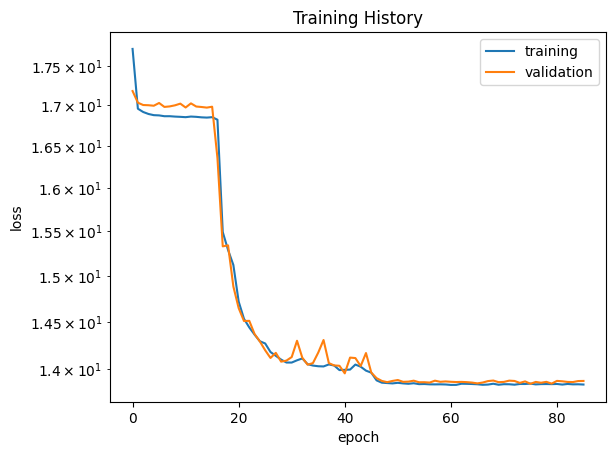

In [20]:
# plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [21]:
labels = ['W', 'Z', 'top']
anomaly = [jetList_W, jetList_Z, jetList_t]
predictedQCD = model.predict(X_test)
print(predictedQCD.shape)
predicted_anomaly = []
for i in range(len(labels)):
    predicted_anomaly.append(model.predict(anomaly[i]))
    print(predicted_anomaly[i].shape)

Tensor("vae/encoder/latent_mu/BiasAdd:0", shape=(None, 10), dtype=float32) Tensor("vae/encoder/latent_logvar/BiasAdd:0", shape=(None, 10), dtype=float32)
766/766 [==============================] - 2s 3ms/step
(24509, 100, 16)
1953/1953 [==============================] - 6s 3ms/step
(62481, 100, 16)
1945/1945 [==============================] - 6s 3ms/step
(62223, 100, 16)
1962/1962 [==============================] - 6s 3ms/step
(62755, 100, 16)


(24509, 100, 16)
(24509, 100, 16)
(100,)
(100,)


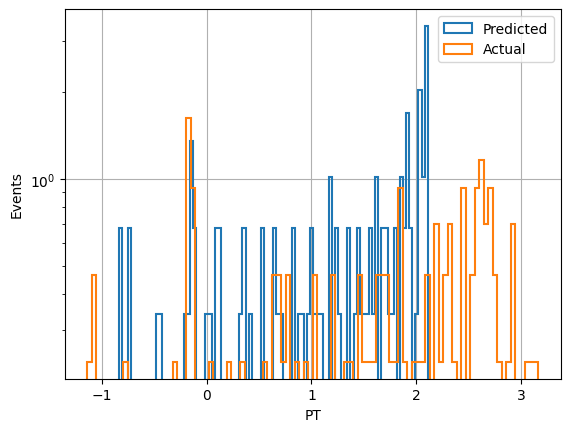

In [22]:
print(predictedQCD.shape)
print(X_test.shape)

#plotting PT distribution for one event
predicted_feature = predictedQCD[1,:,6]
actual_feature = X_test[1,:,6]

print(predicted_feature.shape)
print(actual_feature.shape)

plt.figure()
plt.hist(predicted_feature, bins=100, label='Predicted', density=True,
         histtype='step', fill=False, linewidth=1.5)
plt.hist(actual_feature, bins=100, label='Actual', density=True,
         histtype='step', fill=False, linewidth=1.5)
plt.semilogy()
plt.xlabel("PT")
plt.ylabel("Events")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


In [23]:
def mse(data_in, data_out):
    mse = (data_out-data_in)*(data_out-data_in)
    print(data_in.shape, data_out.shape, mse.shape)
    # sum over features
    mse = mse.sum(-1)
    print(mse.shape)
    mse = mse.sum(-1)
    print(mse.shape)
    return mse

In [ ]:
lossQCD = mse(X_test, predictedQCD)
loss_anomaly = []
for i in range(len(labels)):
    loss_anomaly.append(mse(anomaly[i], predicted_anomaly[i]))

(24509, 100, 16) (24509, 100, 16) (24509, 100, 16)
(24509, 100)
(24509,)


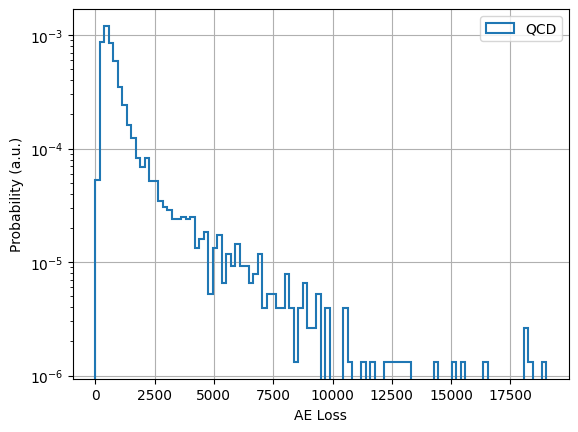

In [ ]:
maxScore = np.max(lossQCD)
# plot QCD
plt.figure()
plt.hist(lossQCD, bins=100, label='QCD', density=True, range=(0, maxScore),
         histtype='step', fill=False, linewidth=1.5)
plt.semilogy()
plt.xlabel("AE Loss")
plt.ylabel("Probability (a.u.)")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

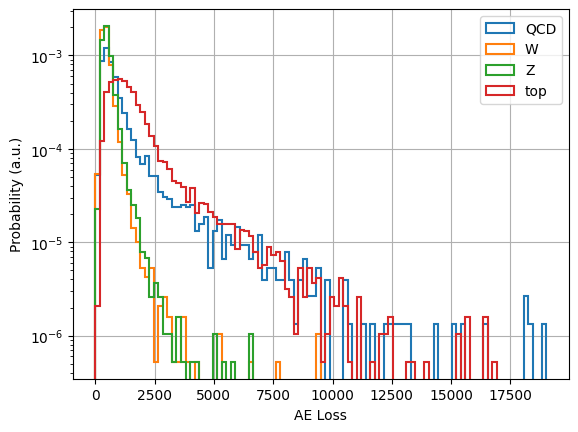

In [ ]:
maxScore = np.max(lossQCD)
# plot QCD
plt.figure()
plt.hist(lossQCD, bins=100, label='QCD', density=True, range=(0, maxScore),
         histtype='step', fill=False, linewidth=1.5)
for i in range(len(labels)):
    plt.hist(loss_anomaly[i], bins=100, label=labels[i], density=True, range=(0, maxScore),
            histtype='step', fill=False, linewidth=1.5)
plt.semilogy()
plt.xlabel("AE Loss")
plt.ylabel("Probability (a.u.)")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

(10015,) (3982,)
(13997,) (13997,)
(10037,) (3982,)
(14019,) (14019,)
(10040,) (3982,)
(14022,) (14022,)


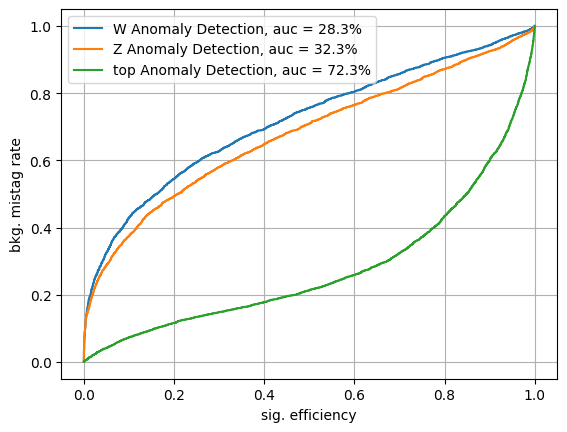

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure()
targetQCD = np.zeros(lossQCD.shape[0])
for i, label in enumerate(labels):
        print(loss_anomaly[i].shape, targetQCD.shape)
        trueVal = np.concatenate((np.ones(loss_anomaly[i].shape[0]),targetQCD))
        predVal = np.concatenate((loss_anomaly[i],lossQCD))
        print(trueVal.shape, predVal.shape)
        fpr, tpr, threshold = roc_curve(trueVal,predVal)
        auc1= auc(fpr, tpr)
        plt.plot(tpr,fpr,label='%s Anomaly Detection, auc = %.1f%%'%(label,auc1*100.))
#plt.semilogy()
plt.xlabel("sig. efficiency")
plt.ylabel("bkg. mistag rate")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()